## Setup 

In [2]:
## Import Necessary Libraries
import pprint
from fastcore.basics import patch
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipycytoscape
from ipycytoscape import CytoscapeWidget

In [6]:
## Creating Author Class
class Author:
    def __init__(self, first, middle, last, email=None, publications=[]):
        self.first = first
        self.middle = middle
        self.last = last
        self.email = email
        self.publications = publications

In [7]:
## Make format pretty
@patch
def __repr__(self:Author):
    return pprint.pformat(vars(self))

In [8]:
## Mock Dataset
a1 = Author('A', 'B', 'Carlson', publications = [1,2,3])
a2 = Author('B', 'C', 'Dawson', publications = [3, 4, 5 ,6])
a3 = Author('C', 'D', 'Elfson', publications = [1, 5, 7, 8])
a4 = Author('D', 'E', 'Fitzgerald', publications = [1, 5, 9, 10])
a5 = Author('E', 'F', 'Gerard', publications = [4, 11, 12])
a5

authors = [a1, a2, a3, a4, a5]

In [9]:
#### Step 1: Making sure correct matches are found between authors ####

# Create the graph
G = nx.Graph()

for index_a in range(len(authors)):
    for index_b in range(index_a + 1, len(authors)):
        author_a = authors[index_a]
        author_b = authors[index_b]
        
        for publication_a in author_a.publications:
            for publication_b in author_b.publications:
                if publication_a == publication_b:
                    G.add_edge(author_a, author_b)
                    print(f"Match found between a{index_a+1} and a{index_b+1} for publication {publication_a}")

Match found between a1 and a2 for publication 3
Match found between a1 and a3 for publication 1
Match found between a1 and a4 for publication 1
Match found between a2 and a3 for publication 5
Match found between a2 and a4 for publication 5
Match found between a2 and a5 for publication 4
Match found between a3 and a4 for publication 1
Match found between a3 and a4 for publication 5


### Creating Nodes and Edges

In [10]:
# Add nodes to the graph
for author in authors:
    G.add_node(author)

In [11]:
#### Step 2: Add edges to the graph based on publication matches ####

for index_a in range(len(authors)):
    for index_b in range(index_a + 1, len(authors)):
        author_a = authors[index_a]
        author_b = authors[index_b]

        for publication_a in author_a.publications:
            for publication_b in author_b.publications:
                if publication_a == publication_b:
                    G.add_edge(author_a, author_b)

## Creating Graph Using NetworkX

In [12]:
# Create the visualization
pos = nx.spring_layout(G)  # Define the layout for node positioning
labels = {author: f"{author.first} {author.last}" for author in G.nodes()}  # Create labels for the nodes


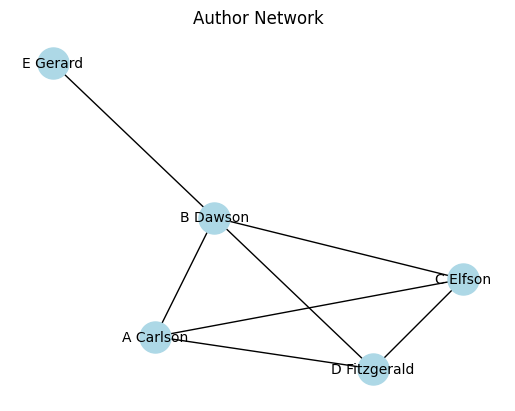

In [13]:
# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

# Display the graph
plt.title("Author Network")
plt.axis('off')  # Hide the axis
plt.show()

## Creating Graph Using iPycytoscape

In [14]:
#### Step 1: Creating Basic Graph ####

# Creates cytoscape widget
cyto = CytoscapeWidget() 

# Set graph from networkX object
cyto.graph.add_graph_from_networkx(G)

# Display the cytoscape widget
cyto

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

In [15]:
#### Step 2: Adding titles ####

cyto = CytoscapeWidget() 
cyto.graph.add_graph_from_networkx(G)

# Create a label for the title
title_label = widgets.Label(value='Author Network Graph', style={'font-weight': 'bold'})

# Display the widgets using a VBox layout
widgets.VBox([title_label, cyto])


In [16]:
#### Step 3: Interchange Options ####

cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G)

##title
title_label = widgets.Label(value='Author Network Graph', style={'font-weight': 'bold'})

# Dropdown widget to switch between types of nodes
dropdown = widgets.Dropdown(options=['Authors', 'Publications'], value='Authors', description='Node Mode:')

# Display the widgets using a VBox layout
widgets.VBox([title_label, dropdown, cyto])
